This notebook is used to produce Figures 9: time series of channel incision, along with thickness change profiles and hydrostatic thickness estimates

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# add path to code
import sys
sys.path.insert(0, '../linear-model')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from operators import  compute_h,compute_s
from params import *

Define the melt-rate perturbation:

In [3]:
# NOTE: 
# Figure 9: set sigma = 1/3 and set L = 5 in linear-model/params.py 
# Figure 10: set sigma = 10/3 and set L = 40 in linear-model/params.py 
# ** also set Nt = 500 or something refined in linear-model/params.py because these are  
# transient calculations
sigma = 1.0/3.0                                                  # standard deviation for gaussian melt anomaly
m = 5*np.exp(-0.5*(sigma**(-2))*(x**2+0*y**2 ))*(t_r/3.154e7)/H  # melt anomaly with amplitude of 5 m/yr


In [4]:
# First compute the elevation solutions
yc = int(Ny/2.)     # y index at centerline   
alpha = 0

ht = compute_h(m,alpha)[:,:,yc] # time-dependent solution
st = compute_s(m,alpha)[:,:,yc] # time-dependent solution

dH = ht-st

dH_hydro = (1+1/delta)*ht

dH_max = np.max(np.abs(dH),axis=-1)
m_max = np.max(m[:,:,yc],axis=-1)*t0

gamma_c = 0.5*delta/(delta+1) 


dH_g0 = np.max(np.abs(compute_h(m,alpha,gamma=5e-3)[:,:,yc]-compute_s(m,alpha,gamma=5e-3)[:,:,yc]),axis=-1)
dH_g1 = np.max(np.abs(compute_h(m,alpha,gamma=1e-2)[:,:,yc]-compute_s(m,alpha,gamma=1e-2)[:,:,yc]),axis=-1)
dH_g2 = np.max(np.abs(compute_h(m,alpha,gamma=2e-2)[:,:,yc]-compute_s(m,alpha,gamma=2e-2)[:,:,yc]),axis=-1)
dH_g3 = np.max(np.abs(compute_h(m,alpha,gamma=3e-2)[:,:,yc]-compute_s(m,alpha,gamma=3e-2)[:,:,yc]),axis=-1)
dH_g4 = np.max(np.abs(compute_h(m,alpha,gamma=4e-2)[:,:,yc]-compute_s(m,alpha,gamma=4e-2)[:,:,yc]),axis=-1)
dH_g5 = np.max(np.abs(compute_h(m,alpha,gamma=gamma_c)[:,:,yc]-compute_s(m,alpha,gamma=gamma_c)[:,:,yc]),axis=-1)

In [5]:
if sigma >2:
    l0 = 3
    h_ex = compute_h(m,alpha,gamma=3e-2)[:,:,yc]
    dH_ex = h_ex -compute_s(m,alpha,gamma=3e-2)[:,:,yc]
    dH_hydro_ex = (1+1/delta)*h_ex
elif sigma <2:
    l0 = 1
    h_ex = compute_h(m,alpha,gamma=1e-2)[:,:,yc]
    dH_ex = h_ex -compute_s(m,alpha,gamma=1e-2)[:,:,yc]
    dH_hydro_ex = (1+1/delta)*h_ex    

In [6]:
i0 = int(3*Nt/4.)-1
dH_err = np.abs(dH[i0,:]-dH_hydro[i0,:])
print('hydrostatic thickness underestimates by '+'{:.2f}'.format(dH_err.max()*100)+'%')

hydrostatic thickness underestimates by 21.20%


In [7]:
i0 = int(3*Nt/4.)-1
dH_err_ex = np.abs(dH_ex[i0,:]-dH_hydro_ex[i0,:])
print('hydrostatic thickness underestimates by '+'{:.2f}'.format(dH_err_ex.max()*100)+'%')

hydrostatic thickness underestimates by 37.38%


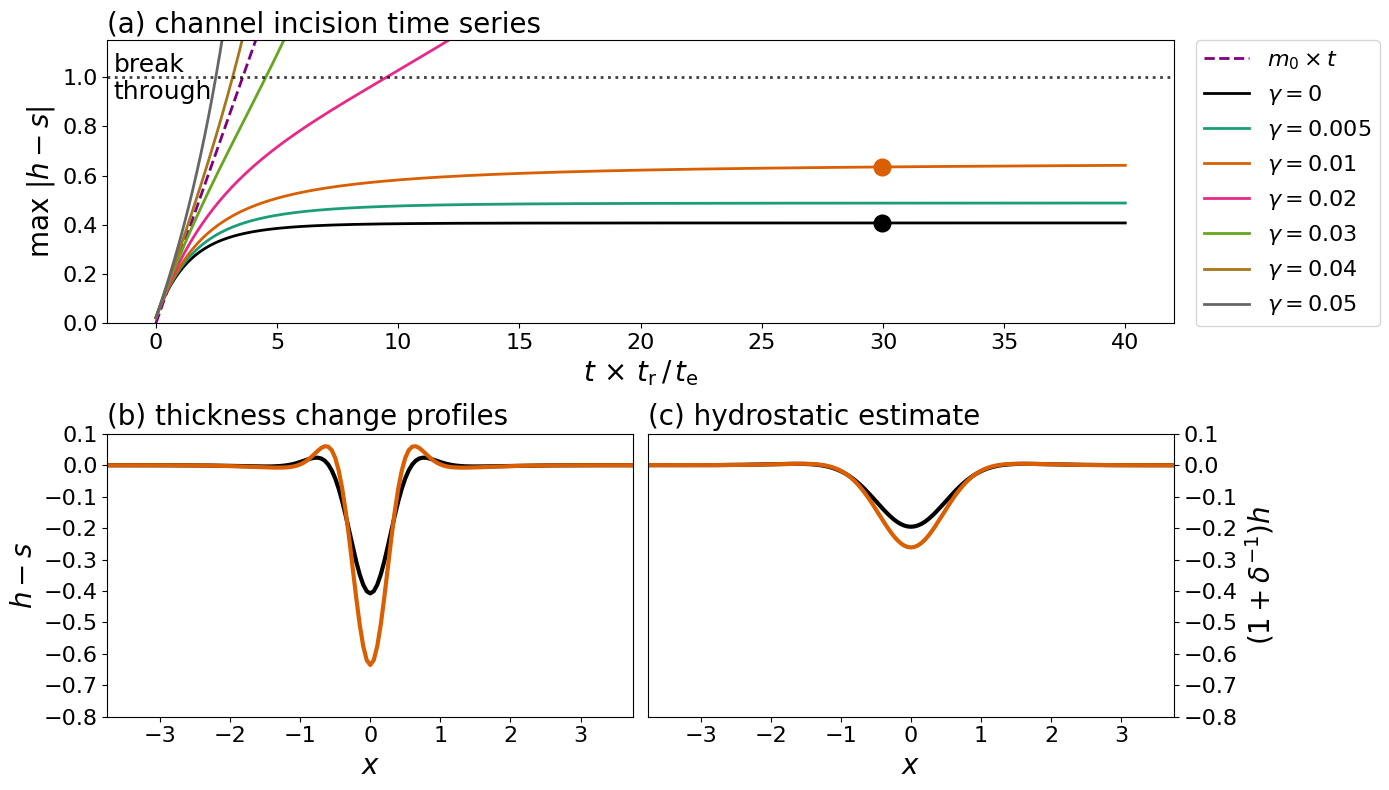

In [10]:
inds = np.linspace(0,3*Nt/4-1,6,dtype='int')[1:None]
colors = pl.cm.Set3(np.linspace(0,1,inds.size))

colors2 = pl.cm.Dark2(np.linspace(0,1,6))


plt.close()
fig = plt.figure(figsize=(14,8))
plt.subplot(223)
plt.title(r'(b) thickness change profiles',loc='left',fontsize=20)
for j in [-1]:#range(inds.size):
    plt.plot(x0,dH[inds[j],:],color='k',linewidth=3)
    plt.plot(x0,dH_ex[inds[j],:],color=colors2[l0],linewidth=3)


plt.ylabel(r'$h-s$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.8,0.1)
plt.xlim(-0.75*L,0.75*L)


plt.subplot(224)
plt.title(r'(c) hydrostatic estimate',loc='left',fontsize=20)
for j in [-1]:
    plt.plot(x0,dH_hydro[inds[j],:],color='k',linewidth=3)
    plt.plot(x0,dH_hydro_ex[inds[j],:],color=colors2[l0],linewidth=3)

plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.ylabel(r'$(1+\delta^{-1})h$',fontsize=20)
plt.xlabel(r'$x$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.8,0.1)
plt.xlim(-0.75*L,0.75*L)

plt.subplot(211)
plt.title(r'(a) channel incision time series',loc='left',fontsize=20)
plt.plot(t0/(t_e/t_r),m_max,color='purple',linestyle='--',linewidth=2,label=r'$m_0\times t$')

plt.plot(t0/(t_e/t_r),dH_max,color='k',linewidth=2,label=r'$\gamma =0$')

plt.plot(t0/(t_e/t_r),dH_g0,linewidth=2,color=colors2[0],label=r'$\gamma = 0.005$')
plt.plot(t0/(t_e/t_r),dH_g1,linewidth=2,color=colors2[1],label=r'$\gamma = 0.01$')
plt.plot(t0/(t_e/t_r),dH_g2,linewidth=2,color=colors2[2],label=r'$\gamma = 0.02$')
plt.plot(t0/(t_e/t_r),dH_g3,linewidth=2,color=colors2[3],label=r'$\gamma = 0.03$')
plt.plot(t0/(t_e/t_r),dH_g4,linewidth=2,color=colors2[4],label=r'$\gamma = 0.04$')
plt.plot(t0/(t_e/t_r),dH_g5,linewidth=2,color=colors2[5],label=r'$\gamma = 0.05$')

for j in [-1]:
    plt.plot(t0[inds[j]]/(t_e/t_r),dH_max[inds[j]],'o',color='k',markersize=12)
    plt.plot(t0[inds[j]]/(t_e/t_r),np.max(np.abs(dH_ex),axis=-1)[inds[j]],'o',color=colors2[l0],markersize=12)


plt.axhline(y=1,linestyle=':',color='k',linewidth=2,alpha=0.75)
plt.annotate(xy=(-1.75,0.91),text=r'break'+'\n'+r'through',fontsize=18,color='k')
plt.ylim(0,1.15)
plt.ylabel(r'$\mathrm{max}\,\,|h-s|$',fontsize=20)
plt.xlabel(r'$t\,\times \,t_\mathrm{r}\,/\,t_\mathrm{e}$',fontsize=20)
# plt.xlabel(r'$t\,\times \,/\,t_\mathrm{e}$',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16,bbox_to_anchor=(1.01,1.04))
plt.tight_layout()
if sigma>2: 
    plt.savefig('fig10')
else:
    plt.savefig('fig9')
plt.show()



In [9]:
# # save some pngs to make a movie if you want
# import os 
# if os.path.isdir('./movie')==False:
#     os.mkdir('./movie')
# yc = int(Ny/2.)       
# alpha = 0
# gamma = 0.
# h = compute_h(m,alpha,gamma=gamma)[:,:,yc]
# s = compute_s(m,alpha,gamma=gamma)[:,:,yc]

# inds = np.arange(0,Nt,1,dtype='int')
# for l in range(np.size(inds)):
#     j = inds[l]
#     plt.close()
#     plt.figure(figsize=(10,4))
#     plt.title(r'$t=$'+'{:.2f}'.format(t0[j]*t_r/t_e)+r' $t_\mathrm{e}$',fontsize=16,zorder=100)
#     plt.plot(x0,h[j,:]+1,color='forestgreen',linewidth=2,zorder=101)
#     plt.plot(x0,s[j,:],color='darkblue',linewidth=2,zorder=102)
#     plt.fill_between(x0,y1=h[j,:]+1,y2=2*np.ones(np.size(x0)),facecolor='w',alpha=1.0,zorder=10)
#     plt.fill_between(x0,y1=s[j,:], y2=h[j,:]+1,facecolor='aliceblue',alpha=1.0)
#     plt.fill_between(x0,y1=-2*np.ones(np.size(x0)), y2=s[j,:],facecolor='lightsteelblue',alpha=1,zorder=15)
#     plt.ylabel(r'$z$',fontsize=20)
#     plt.xlabel(r'$x$',fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)
#     plt.ylim(-0.25,1.1)
#     plt.xlim(-L,L)
#     plt.tight_layout()
#     plt.savefig('./movie/'+str(l))